## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [57]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV


In [61]:

from xgboost import XGBRegressor
import warnings

In [64]:
!pip install cython


     ---------------------------------------- 2.8/2.8 MB 1.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Import the CSV Data as Pandas DataFrame

In [68]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [69]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [111]:
X=df.drop(columns=['math_score'],axis=1)

In [118]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [100]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Iterate through categorical columns and print unique values


for col in categorical_cols:
    print(f"The {col} has {df[col].nunique()} number of Catigeries that is:   {df[col].unique()}")

The gender has 2 number of Catigeries that is:   ['female' 'male']
The race_ethnicity has 5 number of Catigeries that is:   ['group B' 'group C' 'group A' 'group D' 'group E']
The parental_level_of_education has 6 number of Catigeries that is:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The lunch has 2 number of Catigeries that is:   ['standard' 'free/reduced']
The test_preparation_course has 2 number of Catigeries that is:   ['none' 'completed']


In [113]:
y = df['math_score']

In [114]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

##### Create Column Transformer with 3 types of transformers

In [87]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [115]:
cat_features=X.select_dtypes(include='object').columns
num_features =X.select_dtypes(exclude='object').columns

In [117]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [119]:
numeric_transformers=StandardScaler()
oh_transformers=OneHotEncoder()

preprocessor =ColumnTransformer(
    [
    ("OneHotEncoder", oh_transformers,cat_features),
    ("StandardScaler",numeric_transformers,num_features) 
    ]
)

In [120]:
X=preprocessor.fit_transform(X)

In [121]:
X.shape

(1000, 19)

In [122]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [123]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [124]:

X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [125]:
def evaluate_model(y_true,y_pridect):
    mea=mean_absolute_error(y_true,y_pridect)
    mse=mean_squared_error(y_true,y_pridect)
    rmes=np.sqrt(mean_absolute_error(y_true,y_pridect))
    r2_square=r2_score(y_true,y_pridect)
    return mea,mse,rmes,r2_square

In [164]:
list(models.values())[1]

Lasso()

In [130]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae ,model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae ,model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-  Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-  Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.0656
-  Mean Squared Error: 28.3349
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0530
-  Mean Squared Error: 29.0952
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.2817
-  Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.2711
-  Mean Squared Error: 42.5064
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.0652
-  Mean Squared Error: 28.3378
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0521
-  Mean Squared Error: 29.0563
- Mean Absolute Error: 4.211

In [158]:
a=zip(model_list,r2_list)
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','R2_scor']).sort_values(by=['R2_scor'],ascending=False)

,Model,R2_scor
2,Ridge,0.880593
0,Linear Regression,0.880433
7,AdaBoost Regressor,0.854192
5,Random Forest Regressor,0.853130
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.774655


### Results

## Linear Regression

In [165]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


## Plot y_pred and y_test

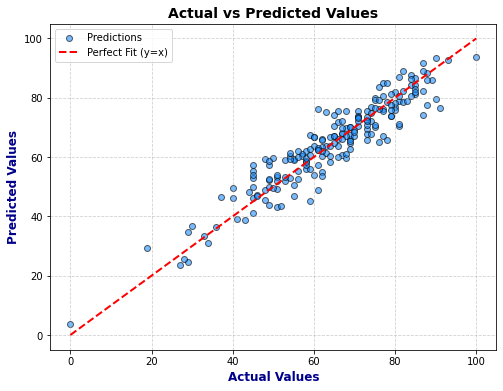

In [168]:
plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.6, edgecolors='k', label="Predictions")

# Add a perfect prediction reference line (y = x)
min_val = min(y_test.min(), y_pred.min())  # Minimum value for the line
max_val = max(y_test.max(), y_pred.max())  # Maximum value for the line
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Perfect Fit (y=x)")

# Labels and title
plt.xlabel("Actual Values", fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel("Predicted Values", fontsize=12, fontweight='bold', color='darkblue')
plt.title("Actual vs Predicted Values", fontsize=14, fontweight='bold', color='black')

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

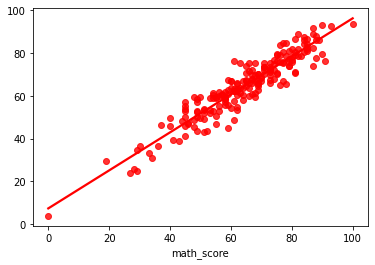

In [167]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [170]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


In [174]:
pred_df['Difference'].sum()

np.float64(-47.407720363240834)